# Сборный проект
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)
import warnings
warnings.simplefilter('ignore')
#импортируем библиотеки

In [2]:
data = pd.read_csv("/datasets/games.csv", sep=",")
data.head()
#сохраняем фаил как data и смотрим первые 5 строк для ознакомления

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()
#смотрим общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()
#смотрим сводку числовых значений

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


Мы получили датафрейм состоящий из 11 столбцов и 16715 строк.

### Подготовка данных.

#### Замена названий столбцов

In [5]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales','jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
#привели названия столбцов к нижнему регистру

In [6]:
data.head(10)
#произвели проверку

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Преобразование данных в нужные типы

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [8]:
data['critic_score']= data['critic_score'].astype('Int64')

In [9]:
#data['user_score'].unique()
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].unique()
#поменяли tbd на Nan

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [10]:
data['user_score'] = data['user_score'].astype('float')

In [11]:
data.info()
#проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


В столбце год выпуска игры ('year_of_release') реобразовали тип данных с float64 на Int64. В столбце оценка критика ('critic_score') поменяти тип данных с float64 на Int64. Для дальнейших рассчетов будет удобнее и правильнее привести формат к целым числам, отбросив лишние нули. В столбце оценка пользователя ('user_score') поменяти тип данных с object на float64. Для дальнейших рассчетов необходимо привести тип данных к числовому типу. Заменили tbd, означающее, что оценка не определена, на пропуск. 

#### Обработка пропусков

In [12]:
data.isna().sum()
#смотрим пропуски в данных

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [13]:
data.duplicated().sum()
#проверка на явные дублипаты

0

In [14]:
print('Количество строк до обработки пропусков:', len(data))

Количество строк до обработки пропусков: 16715


##### Столбец name и genre

In [15]:
data.query('name.isna()')
#вывели строки, в которых пропуск в столбце name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [16]:
data.dropna(subset=['name'], inplace=True)
data.reset_index(inplace=True,drop=True)
#удаляем строки, в которых есть пропуски

Так как пропуски в столбце с названием игры нам восстановить не представляется возможным, мы их удаляем. Удаленные 2 строки не ухудшат качество исследования. Отметим, что таким образом исчезли и пропуски в столбце с жанром игры. Они тоже были пропущенны в этих строках.

##### Столбец year_of_release

In [17]:
data.query('year_of_release.isna()')
#вывели строки, в которых пропуск в столбце year_of_release

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.50,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.40,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.90,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.50,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.70,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [18]:
data.dropna(subset=['year_of_release'], inplace=True)
data.reset_index(inplace=True,drop=True)
#удаляем строки, в которых есть пропуски

Было принято решение  в столбце с годом выхода игры удалить строки с пропущенным значением, так как логически заполнить их нет возможности и они составляют мылай процентр от всего датафрейма. Так же причиной удаления послужил тот факт, что в этих строках были пропущены другие значения, такие как оценка критиков и оценка пользователей.

##### Столбец critic_score 

In [19]:
data.query('critic_score.isna()')
#вывели строки, в которых пропуск в столбце critic_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [20]:
data['critic_score'] = data['critic_score'].fillna(-999)
#заполнили пропуски в стобце critic_score на '-999', поставив "заглушку" для дальнейшей работы.

Заполнили пропуски в стобце critic_score на '-999', поставив "заглушку" для дальнейшей работы.Заглушка может понадобиться, если мы захотим посмотреть какую долю занимают различные значения нашего признака и не учет пропуска может привести к потере большой доли информации, например, рейтинги в регионе продаж и др.

##### Столбец user_score


In [21]:
data.query('user_score.isna()')
#вывели строки, в которых пропуск в столбце user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-999,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-999,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-999,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-999,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-999,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-999,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-999,NaN,NaN


In [22]:
data['user_score'] = data['user_score'].fillna(-999)
#заполнили пропуски в стобце user_score на '-999', поставив "заглушку" для дальнейшей работы.

Заполнили пропуски в стобце user_score на '-999', поставив "заглушку" для дальнейшей работы.Заглушка может понадобиться, если мы захотим посмотреть какую долю занимают различные значения нашего признака и не учет пропуска может привести к потере большой доли информации, например, рейтинги в регионе продаж и др.

##### Столбец rating

In [23]:
data.query('rating.isna()')
#вывели строки, в которых пропуск в столбце rating

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999,-999.00,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-999,-999.00,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-999,-999.00,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-999,-999.00,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-999,-999.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-999,-999.00,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-999,-999.00,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-999,-999.00,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-999,-999.00,NaN


In [24]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
data['rating'] = data['rating'].fillna('unknown')
#заполнили пропуски в стобце rating на 'unknown', поставив "заглушку" для дальнейшей работы.

In [26]:
data.loc[data['rating'] == 'RP', 'rating']='unknown'

Заполнили пропуски в стобце rating на 'unknown', поставив "заглушку" для дальнейшей работы.Заглушка может понадобиться, если мы захотим посмотреть какую долю занимают различные значения нашего признака и не учет пропуска может привести к потере большой доли информации, например, рейтинги в регионе продаж и др. 

RP - означало, что рейтинг не известен. Смысл его такой же как и нашей заглушки. Поэтому чтобы удалить редкое значение мы заменили RP на unknown.

In [27]:
data.isna().sum()
#проверка

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [28]:
print('Количество строк после обработки пропусков:', len(data))

Количество строк после обработки пропусков: 16444


#### Подсчет суммарных продаж во всех регионах

In [29]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
#создали новый столбец 'all_sales' в который добавили сумму всех ранее известных нам продаж

In [30]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999,-999.00,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-999,-999.00,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-999,-999.00,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.40,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-999,-999.00,unknown,28.31


Вывод:


В начале работы, мы превели названия столбцов к нижнему регистру.

Явных дубликатов обнаружено не было.

Затем, в ходе обработки данных были выявлены пропуски в 6 столбцах: name, year_of_release, genre, critic_score, user_score, rating.
В столбцах name и genre пропуски были в одних и тех же строках, Эти строки мы удалили, их было всего 2. В столбцах critic_score и user_score мы поставили числовые "заглушки" для дальнейшей работы. В столбце rating мы поставили "заглушки" 'unknown' для дальнейшей работы. В столбце year_of_release строки с пропущенными значениями пришлось удалить, так как достовено узнать год выхода игры не представлялось возможным. Одна и та же игра может выходить на разных платформах в разные годы. В столбце rating встретилось редкое значение, его мы заменили RP на unknown.

Количество строк до обработки пропусков составляло 16715, после 16444. Мы удалили 2% данных, это не испортит анализ.

Следующим действием был создан столбец all_sales, который показывают суммарные продажи во всех регионах.


### Исследовательский анализ.

#### Количество игр выпускающееся в разные годы

In [31]:
time_release = data.groupby('year_of_release')['name'].count().reset_index()
time_release.columns = ['year', 'quantity']
time_release
#сгруппировав по годам, вывели таблицу с количеством релизов

,year,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


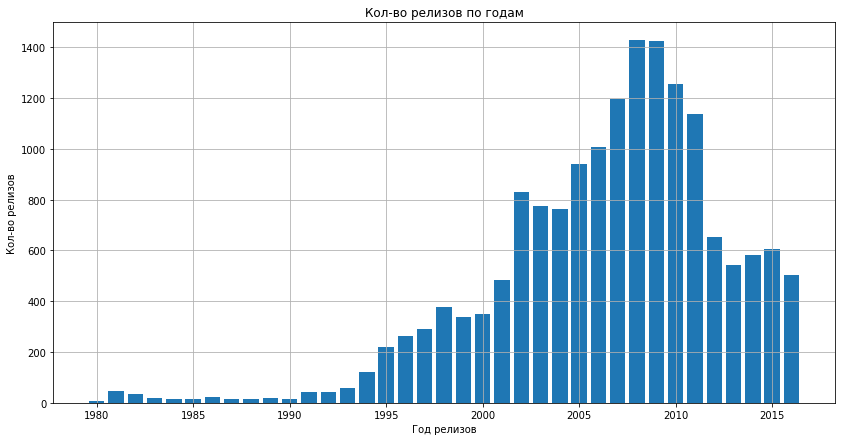

In [32]:
plt.figure(figsize=(14, 7))
plt.bar(time_release['year'], time_release['quantity'], label='Количество релизов за год')
plt.xlabel('Год релизов')
plt.ylabel('Кол-во релизов')
plt.grid()
plt.title(f'Кол-во релизов по годам')
plt.show();

Вывод:

В период с 1980 по 1993 года количество релизов в год было очень скромным, активность низкая. Но после 1994 года пошел стремительный рост и количество релизов увеличивалось, достигнув своего пика в 2008 году. В этот году было выпущено 1427 новых игр. Однако, после 2010 года релизы сокращаются вдвое и держатся вплоть до 2016 года практически на одном уровне, около 550 релизов в год. Количество данных до 1994 года не значительно и для анализа не несет ценность. 

#### Изменение количества продаж по платформам. Платформы с наибольшими суммарными продажами и их распределение распределение по годам

In [33]:
plf = data.groupby('platform')['all_sales'].sum().sort_values(ascending = False).reset_index()
plf
#сгруппировав платформы по общим продажам получаем таблицу. Применили для удобства сортировку значений

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [34]:
pop_platforms = plf.loc[:10, 'platform'].values
pop_platforms
#создали переменную в которую добавили 10 платформ с наибольшими суммарными продажами

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS', 'PC'], dtype=object)

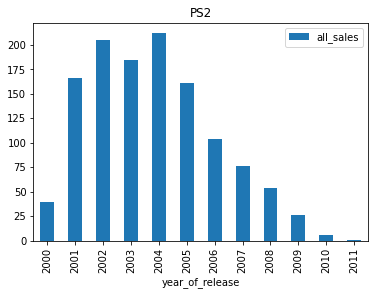

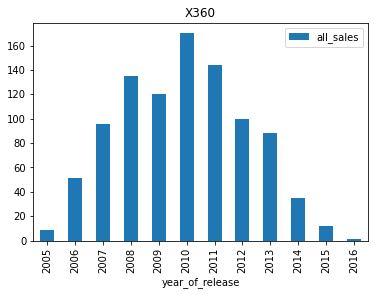

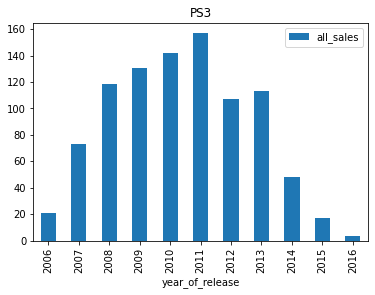

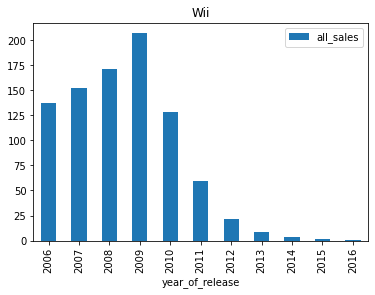

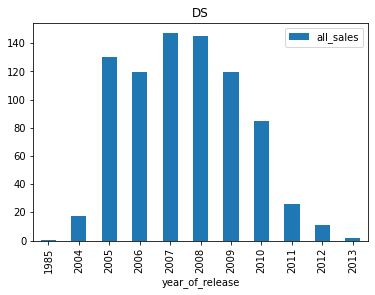

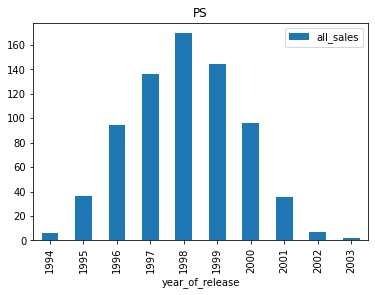

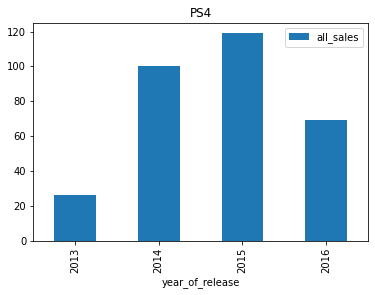

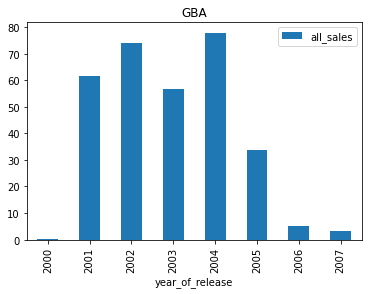

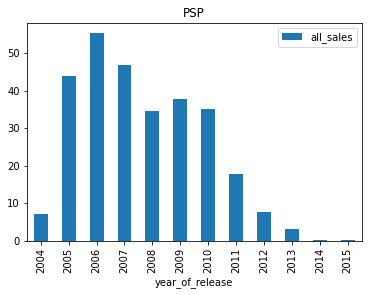

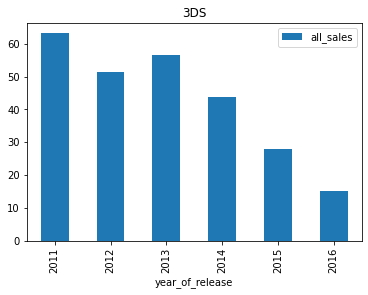

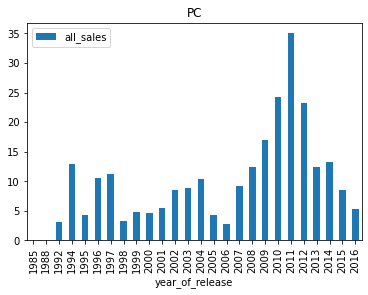

In [35]:
for platform in pop_platforms:
    data.loc[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum').plot.bar()
    plt.title(platform)
    plt.show()
#data.loc[data['rating'] == 'RP', 'rating']

На графиках видим, что период актуальности платформы в среднем 4-5 лет. Это можно считать периодом актуальности. Пик популярности не очень длинный. У более старых платформ продажи с годами падают, доходя своего пика.

#### Данные платформ лидирующих по продажам за актуальный период

In [36]:
act_sales = data[data['year_of_release'] > 2012].groupby('platform')['all_sales'].sum().sort_values(ascending = False).reset_index()
act_sales
#отсортировали актуальные продажи

,platform,all_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


Выше представлен список платформ лидирующих по продажам. Топ 5 платформ абсолютные лидеры с отрывом более чем в 2 раза.

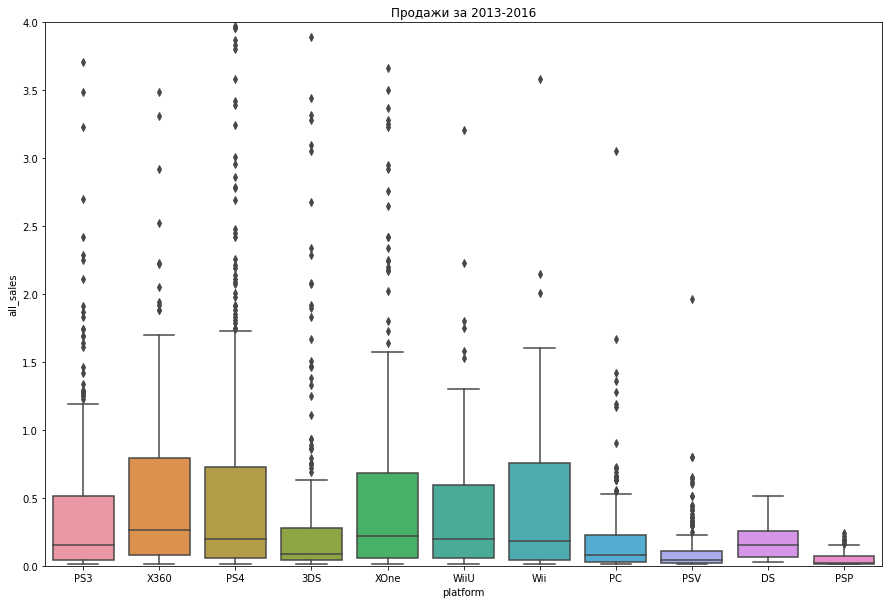

In [37]:
release_1216 = data[data['year_of_release'] > 2012]
plt.figure(figsize = (15,10))
sns.boxplot(x = 'platform', y = 'all_sales', data = release_1216).set(title = 'Продажи за 2013-2016', ylim = (0,4))
plt.show()
#построили ящик с усами

Актуальный период был выбран мной с 2013 по 2016 годы, так как период актуальности платформы около 4 лет. Выбросы зашумляли график, поэтому пришлось обрезать график по оси y. У Х360 медиана самая высокая, но как мы посмотрели ранее, эта платформа "вымирает". Из "живучих" на данный момент у PS4 высокая медиана.

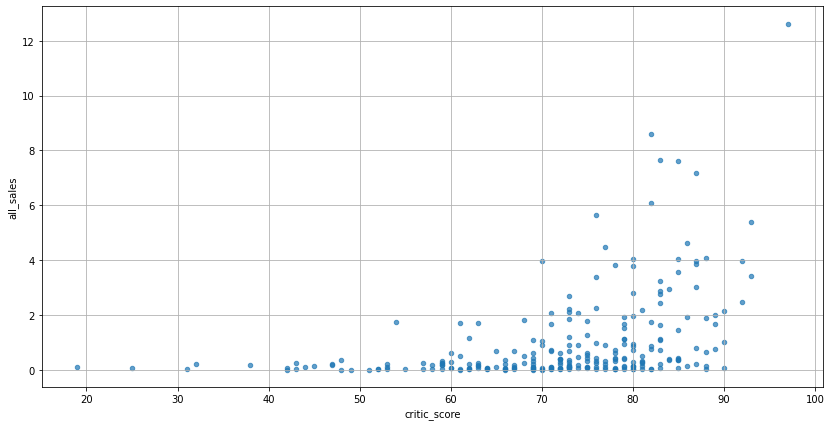

In [38]:
PS4 = data[(data['platform'] == 'PS4') & (data['critic_score'] != -999) & (data['user_score'] != -999)]
PS4.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, figsize=(14,7), alpha=0.7);
#построили диаграмму рассеяния, чтобы посмотеть зависимость общего числа продаж от оценки критиков

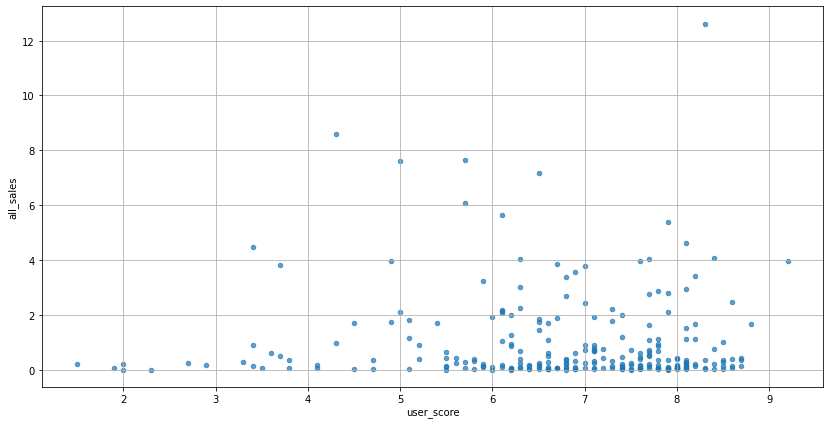

In [39]:
PS4.plot(x='user_score', y='all_sales', kind='scatter', grid=True, figsize=(14,7), alpha=0.7);
#построили диаграмму рассеяния, чтобы посмотеть зависимость общего числа продаж от оценки пользователей

In [40]:
PS4_pl = data.query('platform=="PS4"')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
PS4_pl
PS4_pl.corr()

,all_sales,critic_score,user_score
all_sales,1.00,0.15,0.13
critic_score,0.15,1.00,0.94
user_score,0.13,0.94,1.00


Корреляция между оценкой пользователей и продажами отсутствует.
Корреляция между оценкой критиков и продажами есть, но она слабоя (0,41). Исходя из этого можем сделать вывод, что отзывы критиков важны и зависимость здесь прямопропорциональная.

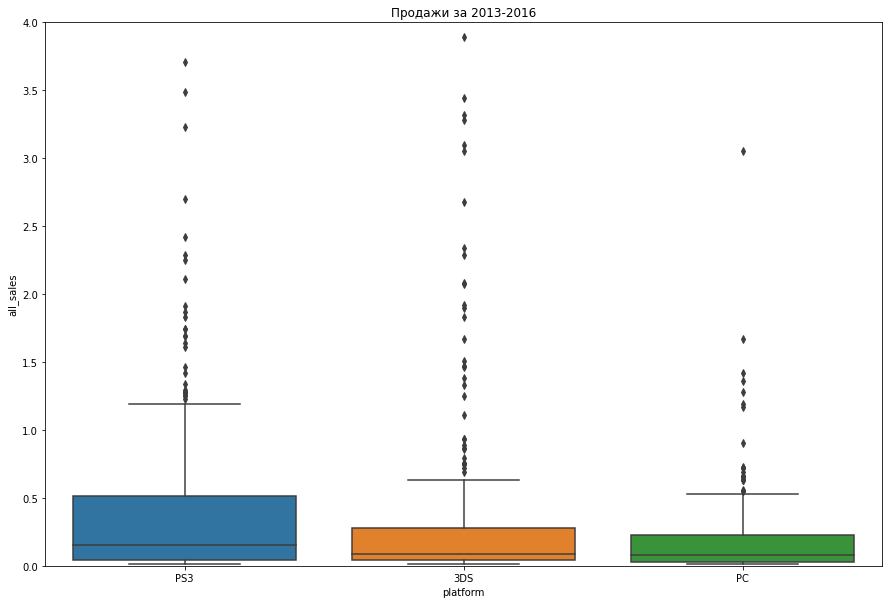

In [41]:
games = data[(data['year_of_release'] > 2012) & ((data['platform'] == '3DS') | (data['platform'] == 'PS3') | (data['platform'] == 'PC'))]
plt.figure(figsize = (15,10))
sns.boxplot(x = 'platform', y = 'all_sales', data = games).set(title = 'Продажи за 2013-2016', ylim = (0,4))
plt.show()
#построили ящик с усами для двух других платформ

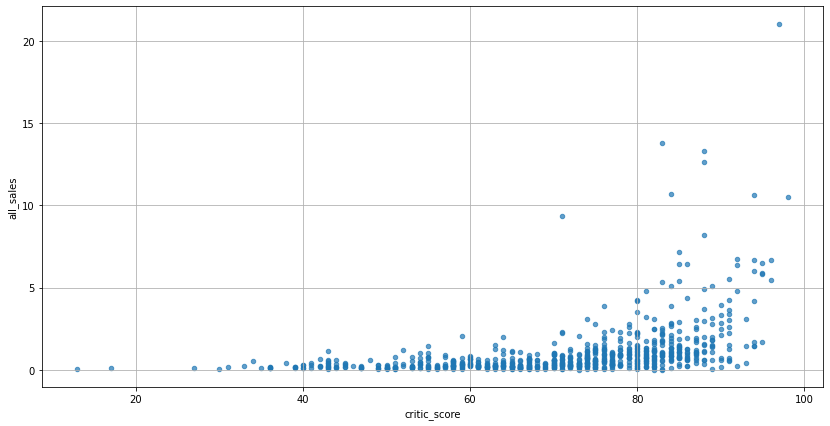

In [42]:
PS3 = data[(data['platform'] == 'PS3') & (data['critic_score'] != -999) & (data['user_score'] != -999)]
PS3.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, figsize=(14,7), alpha=0.7);

#построили график для PS3

In [43]:
PS3_pl = data.query('platform=="PS3"')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
PS3_pl
PS3_pl.corr()
#PS3.corr()

,all_sales,critic_score,user_score
all_sales,1.00,0.25,0.25
critic_score,0.25,1.00,0.81
user_score,0.25,0.81,1.00


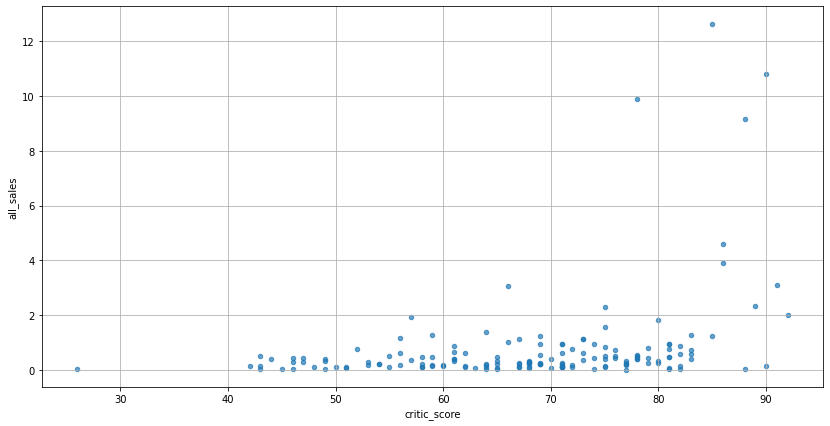

In [44]:
DS3 = data[(data['platform'] == '3DS') & (data['critic_score'] != -999) & (data['user_score'] != -999)]
DS3.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, figsize=(14,7), alpha=0.7);

#построили график для 3DS

In [45]:
DS3_pl = data.query('platform=="PS3"')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
DS3_pl
DS3_pl.corr()
DS3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.00,-0.14,-0.12,0.01,-0.13,0.18,0.23,-0.09
na_sales,-0.14,1.00,0.96,0.75,0.99,0.33,0.21,0.96
eu_sales,-0.12,0.96,1.00,0.83,0.98,0.30,0.18,0.98
jp_sales,0.01,0.75,0.83,1.00,0.78,0.34,0.28,0.89
other_sales,-0.13,0.99,0.98,0.78,1.00,0.31,0.19,0.98
critic_score,0.18,0.33,0.30,0.34,0.31,1.00,0.75,0.34
user_score,0.23,0.21,0.18,0.28,0.19,0.75,1.00,0.23
all_sales,-0.09,0.96,0.98,0.89,0.98,0.34,0.23,1.00


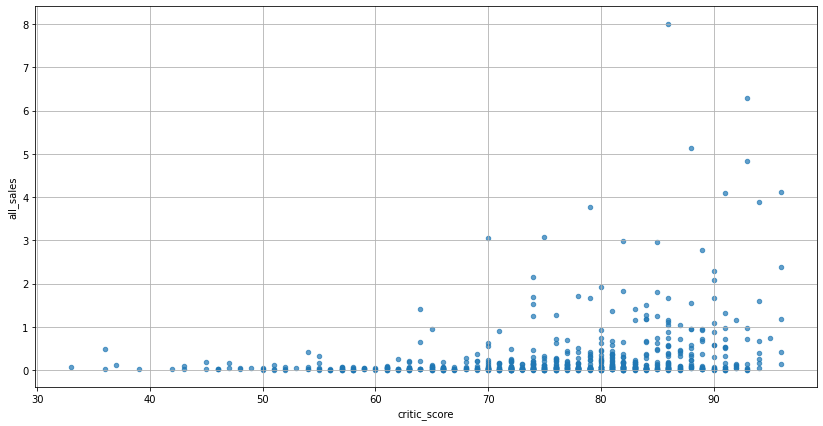

In [46]:
PC = data[(data['platform'] == 'PC') & (data['critic_score'] != -999) & (data['user_score'] != -999)]
PC.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, figsize=(14,7), alpha=0.7);

In [47]:
PC.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.00,-0.10,0.01,-0.11,0.07,-0.16,-0.36,-0.04
na_sales,-0.10,1.00,0.38,0.50,0.39,0.19,0.03,0.77
eu_sales,0.01,0.38,1.00,-0.02,0.54,0.22,-0.01,0.87
jp_sales,-0.11,0.50,-0.02,1.00,-0.02,0.10,0.07,0.24
other_sales,0.07,0.39,0.54,-0.02,1.00,0.21,-0.02,0.64
critic_score,-0.16,0.19,0.22,0.10,0.21,1.00,0.56,0.26
user_score,-0.36,0.03,-0.01,0.07,-0.02,0.56,1.00,0.00
all_sales,-0.04,0.77,0.87,0.24,0.64,0.26,0.00,1.00


Схожие тенденции имеют место почти для всех платформ. Зависимость продаж пропорцианальная, от отзывов критиков слабая но ближе к средней, а от отзывов пользователей значительно слабее, чем критиков, во многих её почти нет.

#### Распределение игр по жанрам

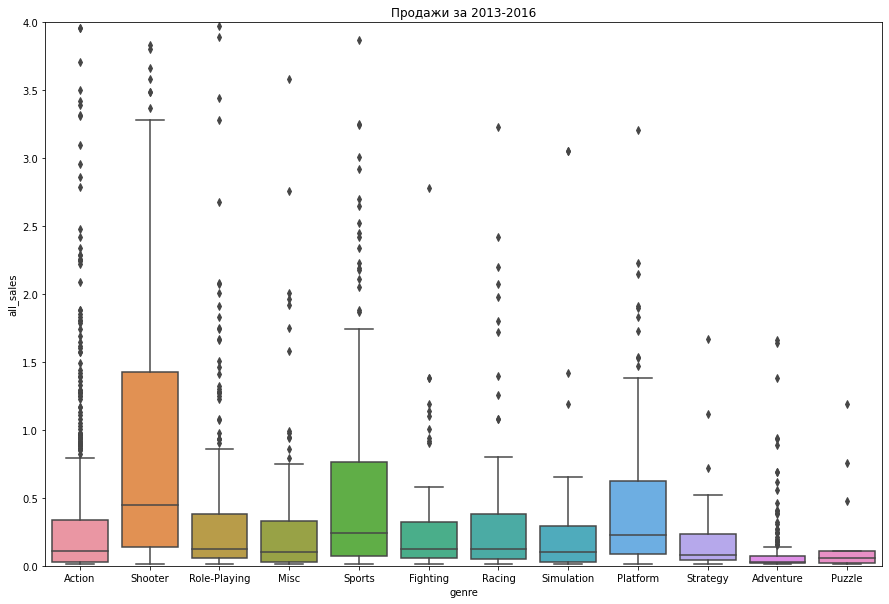

In [48]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'genre', y = 'all_sales', data = release_1216).set(title = 'Продажи за 2013-2016', ylim = (0,4))
plt.show()

У жанра стрелялки медианные продажи самые высокие 2013-2016 годы.

In [49]:
release_1216.groupby('genre').agg('sum')
#.sort_values()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
genre,,,,,,,,
Action,1543186,126.05,118.13,40.49,37.20,-430182,-373963.20,321.87
Adventure,493536,7.14,8.25,5.82,2.43,-194388,-184367.30,23.64
Fighting,161153,15.55,8.55,7.65,3.56,-35039,-31630.20,35.31
Misc,312231,27.49,20.04,9.20,6.09,-108737,-102534.30,62.82
Platform,149043,18.14,15.58,4.79,4.12,-19212,-15594.60,42.63
Puzzle,34243,0.83,1.00,1.18,0.16,-9461,-9937.70,3.17
Racing,171240,12.96,20.19,2.30,4.44,-19631,-19584.80,39.89
Role-Playing,588203,46.40,36.97,51.04,11.48,-155504,-154840.80,145.89
Shooter,376687,109.74,87.86,6.61,28.77,-43176,-29979.60,232.98


Общее распределение игр по жанрам - в тройку лидеров входят Shooter, Sports и Platform; аутсайдеры здесь Strategy, Puzzle и Adventure.

В продажах по жанрам в лидерах опять Action, Shooter и Sports; аутсайдеры здесь Puzzle, Strategy и Simulation.
Можно отметить, что продажи лидера Action и аутсайдера Puzzle отличаются в 100 раз.
Но делать анализ по суммарным продажам не совсем корректно, необходимо смотреть еще и на статистику.

### Портрет пользователя каждого региона

#### Самые популярные платформы

In [50]:
plf_na = release_1216.groupby('platform')['na_sales'].sum().sort_values(ascending = False).reset_index()
plf_na
plf_na[:5]
#cмотрим распределение продаж за актуальный период в выбраном регионе

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


In [51]:
plf_na[:5]['na_sales'].sum()/plf_na['na_sales'].sum()
#доля продаж у лидеров рынка (топ-5)

0.8800804185419571

In [52]:
plf_eu = release_1216.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).reset_index()
plf_eu
plf_eu[:5]
#cмотрим распределение продаж за актуальный период в выбраном регионе

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


In [53]:
plf_eu[:5]['eu_sales'].sum()/plf_eu['eu_sales'].sum()
#доля продаж у лидеров рынка (топ-5)

0.8514647018331082

In [54]:
plf_jp = release_1216.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).reset_index()
plf_jp
plf_jp[:5]
#cмотрим распределение продаж за актуальный период в выбраном регионе

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


In [55]:
plf_jp[:5]['jp_sales'].sum()/plf_jp['jp_sales'].sum()
#доля продаж у лидеров рынка (топ-5)

0.9702372496093193

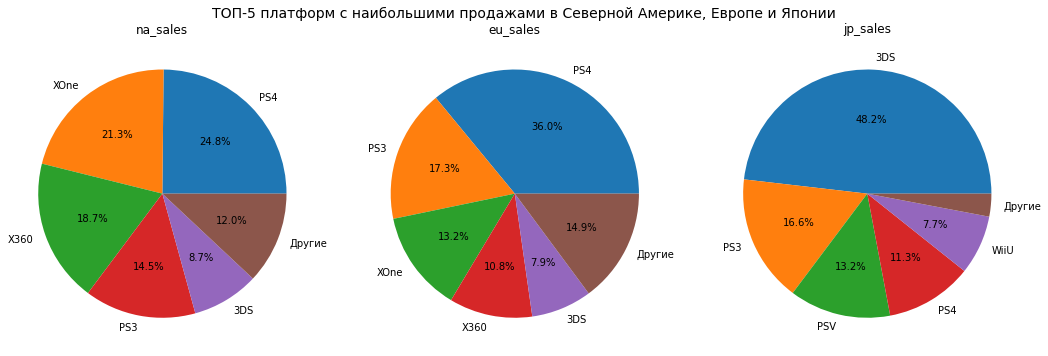

In [56]:
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = data.query('year_of_release > 2012').groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['platform'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 платформ с наибольшими продажами в Северной Америке, Европе и Японии', fontsize=14)
plt.tight_layout()
plt.show()

Топ 5 платформ по продажам в Северной Америке занимают 88% рынка. Лидеры в этом регионе: PS4, XOne, X360, PS3, 3DS.	Топ 5 платформ по продажам в Европе занимают 85% рынка. Лидеры в этом регионе: PS4, PS3, XOne, X360, 3DS.
Топ 5 платформ по продажам в Японии занимают 97% рынка. Лидеры в этом регионе: 3DS, PS3, PSV, PS4, Wii.
Проведя анализ, можно сделать вывод, что топ 5 платформ каждом регионе занимают большую часть рынка 85-97%. Распределение платформ в Северной Америке и Европе очень схоже, различие лишь в порядке располажения платформ. А вот в Японии немного различается, в Японии в топе платформ PSV и Wii, которые не были замечены в топе других регионов.

#### Самые популярные жанры

In [57]:
genre_na = release_1216.groupby('genre')['na_sales'].sum().sort_values(ascending = False).reset_index()
genre_na

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Platform,18.14
6,Fighting,15.55
7,Racing,12.96
8,Adventure,7.14
9,Simulation,4.86


In [58]:
genre_eu = release_1216.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).reset_index()
genre_eu

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,Misc,20.04
6,Platform,15.58
7,Simulation,10.92
8,Fighting,8.55
9,Adventure,8.25


In [59]:
genre_jp = release_1216.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).reset_index()
genre_jp

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61
5,Adventure,5.82
6,Sports,5.41
7,Platform,4.79
8,Simulation,4.52
9,Racing,2.30


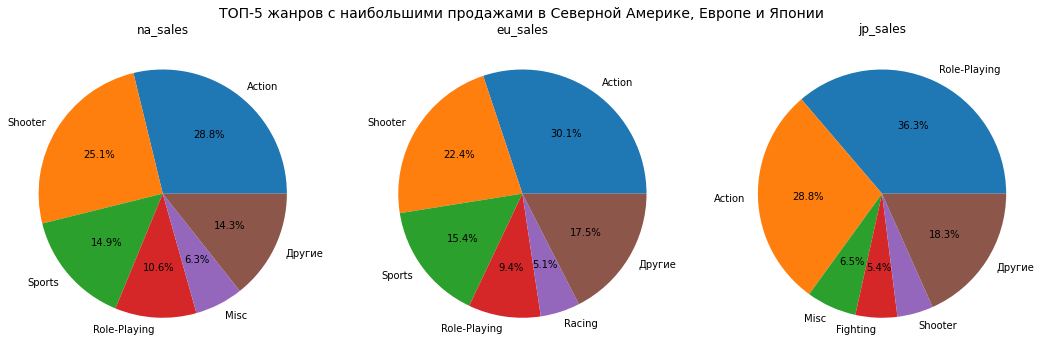

In [60]:
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_genre = data.query('year_of_release > 2012').groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_genre.loc[5] = ['Другие', region_genre.loc[5:][region].sum().round(2)]
    region_top_genre = region_genre.head(6)        
    ax[i].pie(region_top_genre[region], labels=region_top_genre['genre'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 жанров с наибольшими продажами в Северной Америке, Европе и Японии', fontsize=14)
plt.tight_layout()
plt.show()

В распределении продаж по жанрам картины схожа. Северная  Америка и Европа очень сходи по этому признаку. Первые 4 позиции в распределении абсолютно идентичны. Жанры Action и Shooter крепко держатся на лидерских позициях. Стоит заметить, что в Европе жанр Action имеет внушительным отрыв от других жанров. Япония снова отличается. Здесь лидер - Role-Playing, Action идет на второй позиции. Жанр Fighting тоже вошел в топ 5.

#### Влияние ли рейтинга ESRB на продажи в отдельном регионе

*Информация для справки*

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

«E» («Everyone») — «Для всех»

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

In [61]:
rating_na = release_1216.groupby('rating')['na_sales'].sum().sort_values(ascending = False).reset_index()
rating_na

,rating,na_sales
0,M,165.21
1,unknown,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


In [62]:
rating_eu = release_1216.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).reset_index()
rating_eu

,rating,eu_sales
0,M,145.32
1,E,83.36
2,unknown,78.91
3,E10+,42.69
4,T,41.95


In [63]:
rating_jp = release_1216.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).reset_index()
rating_jp

,rating,jp_sales
0,unknown,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


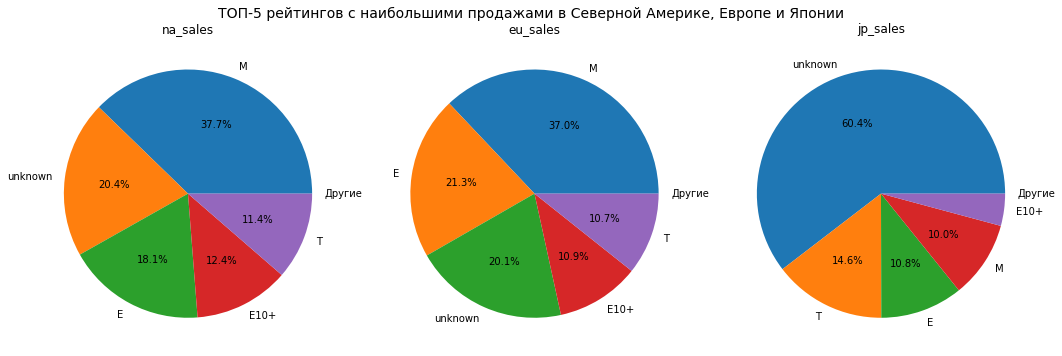

In [64]:
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_rating = data.query('year_of_release > 2012').groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_rating.loc[5] = ['Другие', region_rating.loc[5:][region].sum().round(2)]
    region_top_rating = region_rating.head(6)        
    ax[i].pie(region_top_rating[region], labels=region_top_rating['rating'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 рейтингов с наибольшими продажами в Северной Америке, Европе и Японии', fontsize=14)
plt.tight_layout()
plt.show()

Существует (по нашей таблице) 4 основных рейтинга: «E»,«T»,«M» и «E10+» (другие очень не популярны). На первом месте «М» и далее «E», «E10+», «T». Так же нередко встречаются игры с неопределенным рейтингом, в категорию "unknown" попали игры, у которых в столбце genre был пропуск.
Исключение снова составила Япония, где продажи с рейтингом «M» на 4 позиции. Лидером стал unknown. Далее игры для подростков и категория игр для всех возрастов. 
Влияние рейтинга на продажи в разных регионах почти одинаково.

### Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Так как H₀ всегда формулируется так, чтобы использовать знак равенства, то нулевую гипотезу сформулируем также (как по заданию): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; альтернативная гипотеза H₁ тогда будет такая - Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [65]:
#XOne = release_1216.query(' platform == "XOne" ')['user_score'].dropna().to_list() #так было
XOne = release_1216.query('platform == "XOne" & user_score != - 999')['user_score'].dropna().to_list()
PC = release_1216.query(' platform == "PC" & user_score != - 999')['user_score'].dropna().to_list()
#сформировали списки для 2 платформ

In [66]:
XOne_filt = release_1216.query('platform == "XOne" & user_score != - 999')['user_score'].mean()
XOne_filt
#средний пользовательский рейтинг XOne

6.521428571428572

In [67]:
PC_filt = release_1216.query('platform == "PC" & user_score != - 999')['user_score'].mean()
PC_filt
#средний пользовательский рейтинг PC

6.2696774193548395

In [68]:
print('Дисперсия XOne =', np.var(XOne), '// Дисперсия PC =', \
      np.var(PC))

Дисперсия XOne = 1.8965188383045526 // Дисперсия PC = 3.016306347554631


In [69]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу - это значит, что Гипотеза №2 отвергнута, а средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Дисперсии отличаются, поэтому взяли equal_var=False. Так как нам не нужны сверх точные значения, то указали критический уровень статистической значимости 5% alpha = 0.05. Использовали t-test так как нам необходимо было проверить гипотезу равенства средних значений.


#### Средние пользовательские рейтинги жанров Action и Sports разные

Так как H₀ всегда формулируется так, чтобы использовать знак равенства то нулевую гипотезу сформулируем так: Средние пользовательские рейтинги жанров Action и Sports равны; альтернативная гипотеза H₁ тогда будет такая - Средние пользовательские рейтинги жанров Action и Sports разные.



In [70]:
Action = release_1216.query('genre == "Action" & user_score != - 999')['user_score'].dropna().to_list()
#release_1216.query('genre == "Action" ')['user_score'].dropna().to_list()
Sports = release_1216.query('genre == "Sports" & user_score != - 999')['user_score'].dropna().to_list()

In [71]:
act_filt = release_1216.query('genre == "Action" & user_score != - 999')['user_score'].mean()
act_filt
#средний пользовательский рейтинг Action

6.837532133676092

In [72]:
sp_filt = release_1216.query('genre == "Sports" & user_score != - 999')['user_score'].mean()
sp_filt
#средний пользовательский рейтинг Sports

5.238124999999999

In [73]:
print('Дисперсия Action =', np.var(Action), '// Дисперсия Sports =', \
      np.var(Sports))

Дисперсия Action = 1.7648124186332366 // Дисперсия Sports = 3.160733984375


In [74]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(Action, Sports, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута - это значит, что средние пользовательские рейтинги жанров Action и Sports разные.

Дисперсии отличаются, поэтому взяли equal_var=False. Так как нам не нужны сверх точные значения, то указали критический уровень статистической значимости 5% alpha = 0.05. Использовали t-test так как нам необходимо было проверить гипотезу равенства средних значений.


### Общий вывод

Для исследования нам был дан датасет с информациеей о компьютерных играх.

В ходе предобработки данных:

В столбцах name и genre удалено 2 строки, применяли лемматизацию для поиска схожих имен, но в итоге дубликатов не нашли.
Столбец year_of_release - пропуски удалили из-за невозможности их заполнения.
В столбцах critic_score и user_score пропуски заполнены заглушками, для возможности проаведения операций в дальнейшем.
Столбец rating - заменили проппуски на 'unknown' - это неизвестный рейтинг.
Дубликатов не выявленно
По заданию добавлен столбец sales с суммой всех продаж в регионах

В ходе анализа было выявлено:

В период с 1980 по 1993 года количество релизов в год было очень скромным, активность низкая. Но после 1994 года пошел стремительный рост и количество релизов увеличивалось - компьютерные игры захватывают мир. И достигают своего пика в 2008 году. В этот году было выпущено 1427 новых игр. Однако, после 2010 года релизы сокращаются вдвое и держатся вплоть до 2016 года практически на одном уровне, около 550 релизов в год. Количество данных до 1994 года не значительно и для анализа не несет ценность. 

Период актуальности платформы в среднем 4-5 лет. Пик популярности не очень длинный. У более старых платформ продажи с годами падают, доходя своего пика. Поэтому мы будем брать интервал с 2013 по 2016 годы предоставляя прогноз на 2017 год.

По прогнозу на 2017 год можно сказать: лидеры - PS4 и XOne! PSV, WiiU и 3DS - тоже можно продолжать развивать, но в меньших объемах(PSV - развитие идет слабо, поэтому приоритет у WiiU и 3DS); платформа PC - актуальна всегда(но в малых объемах), поэтому надо поддерживать её развитие.

Схожие тенденции имеют место почти для всех платформ. Зависимость продаж прямопропорцианальная,- от отзывов критиков слабая но ближе к средней, а от отзывов пользователей её почти нет. 

Общее распределение игр по жанрам - в тройку лидеров входят Shooter, Sports и Platform; аутсайдеры здесь Strategy, Puzzle и Adventure. Можно отметить, что продажи лидера Action и аутсайдера Puzzle отличаются в 100 раз.

Изучили портрет пользователя каждого региона:

Лидеры продаж в регионах разные: Америка и Европа - PS4 и Япония - 3DS. В Америке и Европе пользуются в основном одними и теми же платформами - X360, XOne, 3DS, PS3, они и входят в топ 5. В Японии другая картина: тут более популярны платформы 3DS, PS3, PS4,PSV, Wii, последние две не входят в топ по Северной Америке и Европе. Проведя анализ, можно сделать вывод, что топ 5 платформ каждом регионе занимают большую часть рынка 85-97%. Надо отметить, что платформа PS4 очень популярна во всех регионах.

В распределении продаж по жанрам картины схожа. Северная Америка и Европа очень сходи по этому признаку. Первые 4 позиции в распределении абсолютно идентичны. Жанры Action и Shooter крепко держатся на лидерских позициях. Стоит заметить, что в Европе жанр Action имеет внушительным отрыв от других жанров. Япония снова отличается. Здесь лидер - Role-Playing связано это, вероятнее всего, с особенностями сильных курьтурных различий. Action идет на второй позиции. Жанр Fighting тоже вошел в топ 5 Японии.

Влияние рейтинга ESRB на продажи в разных регионах почти одинаково. На первом месте «М» и далее «Е»,«Т» и «E10+». Игры для взрослых лидируют! Так же нередко встречаются игры с неопределенным рейтингом, в категорию "unknown" попали игры, у которых в столбце genre был пропуск. Исключение снова составила Япония, где продажи с рейтингом «M» на 4 позиции. Лидером стала неопределенная категория, а далее игры для подростков и категория игр для всех возрастов.

Проверка гипотез показала, что:

В первом случае не получилось отвергнуть нулевую гипотезу и мы выявили, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Средние пользовательские рейтинги жанров Action и Sports различны, во втором случае мы отвергли нулевую гипотезу. 

Рынок компьютерных игр Японии - особый мир, где есть свои уникальные особенности, отличающиеся от Европы и Северной Америки и на это бесспорно стоит обращать большое внимание.
